In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# SETUP AND CONFIGURATION
# DEFINING THE PORTFOLIO AND LOOKBACK PERIOD
# WE'LL USE 3 YEARS OF DATA WITH 252 TRADING DAYS PER YEAR
TICKERS = ['SPY', 'TLT', 'GLD', 'NVDA']
START_DATE = '2021-01-01'
END_DATE = datetime.today().strftime('%Y-%m-%d')

In [ ]:
from IPython.utils.io import raw_print
# DATA INTEGRATION
def get_data(tickers, start, end):
    raw_data = yf.download(tickers = TICKERS, start= START_DATE, end = END_DATE)
    if 'Adj Close' in raw_data.columns:
      raw_data = raw_data['Adj Close'][TICKERS]
    return raw_data

In [ ]:
prices = get_data(TICKERS, START_DATE, END_DATE)

/tmp/ipython-input-3802980081.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers = TICKERS, start= START_DATE, end = END_DATE)
[*********************100%***********************]  4 of 4 completed


In [ ]:
prices = get_data(TICKERS, START_DATE, END_DATE)
print(prices)

/tmp/ipython-input-3802980081.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers = TICKERS, start= START_DATE, end = END_DATE)
[*********************100%***********************]  4 of 4 completed

Price            Close                                            High  \
Ticker             GLD        NVDA         SPY         TLT         GLD   
Date                                                                     
2021-01-04  182.330002   13.076723  345.273956  135.237976  182.399994   
2021-01-05  182.869995   13.367158  347.652069  134.233658  183.210007   
2021-01-06  179.899994   12.579125  349.730377  131.478058  181.580002   
2021-01-07  179.479996   13.306579  354.926636  130.319183  179.919998   
2021-01-08  173.339996   13.239516  356.948883  129.898514  176.990005   
...                ...         ...         ...         ...         ...   
2025-12-10  389.049988  183.779999  687.570007   88.309998  389.760010   
2025-12-11  393.239990  180.929993  689.169983   88.190002  394.089996   
2025-12-12  395.440002  175.020004  681.760010   87.339996  400.390015   
2025-12-15  395.799988  176.289993  680.729980   87.400002  398.709991   
2025-12-16  395.890015  177.720001  67

In [ ]:
# DATA CLEANING
prices.dropna(inplace=True)
print("Raw Columns:", prices.columns)
if isinstance(prices.columns, pd.MultiIndex):
  prices.columns = prices.columns.get_level_values(1)
prices = prices[TICKERS]
print("Cleaned Columns:", prices.columns)

Raw Columns: MultiIndex([( 'Close',  'GLD'),
            ( 'Close', 'NVDA'),
            ( 'Close',  'SPY'),
            ( 'Close',  'TLT'),
            (  'High',  'GLD'),
            (  'High', 'NVDA'),
            (  'High',  'SPY'),
            (  'High',  'TLT'),
            (   'Low',  'GLD'),
            (   'Low', 'NVDA'),
            (   'Low',  'SPY'),
            (   'Low',  'TLT'),
            (  'Open',  'GLD'),
            (  'Open', 'NVDA'),
            (  'Open',  'SPY'),
            (  'Open',  'TLT'),
            ('Volume',  'GLD'),
            ('Volume', 'NVDA'),
            ('Volume',  'SPY'),
            ('Volume',  'TLT')],
           names=['Price', 'Ticker'])
Cleaned Columns: Index(['SPY', 'SPY', 'SPY', 'SPY', 'SPY', 'TLT', 'TLT', 'TLT', 'TLT', 'TLT',
       'GLD', 'GLD', 'GLD', 'GLD', 'GLD', 'NVDA', 'NVDA', 'NVDA', 'NVDA',
       'NVDA'],
      dtype='object', name='Ticker')


In [ ]:
# 1. Download
raw_data = yf.download(TICKERS, start=START_DATE, end=END_DATE, progress=False)

# 2. Force-Flatten the MultiIndex
# We select 'Adj Close' and immediately drop the top level of the index
prices = raw_data['Close'].copy()

# 3. Ensure we only have our 4 tickers and no extra 'Price' labels
prices = prices[TICKERS]

# 4. Calculate Returns
log_returns = np.log(prices / prices.shift(1)).dropna()

# --- THE MOMENT OF TRUTH ---
print(f"Final Matrix Shape: {log_returns.shape}")
# This MUST be (N, 4). If it is, the line below will finally work:
print("Success! Portfolio returns calculated.")

Final Matrix Shape: (1244, 4)
Success! Portfolio returns calculated.


/tmp/ipython-input-1844421294.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(TICKERS, start=START_DATE, end=END_DATE, progress=False)


In [ ]:
print(f"Verified Matrix Shape: {log_returns.shape}")
print("\nFirst 5 rows of the clean Return Matrix:")
print(log_returns.head())

Verified Matrix Shape: (1244, 4)

First 5 rows of the clean Return Matrix:
Ticker           SPY       TLT       GLD      NVDA
Date                                              
2021-01-05  0.006864 -0.007454  0.002957  0.021967
2021-01-06  0.005960 -0.020742 -0.016374 -0.060762
2021-01-07  0.014749 -0.008853 -0.002337  0.056220
2021-01-08  0.005681 -0.003233 -0.034809 -0.005053
2021-01-11 -0.006764 -0.001654 -0.001963  0.025635


In [ ]:
# RETURN CALCULATION
# Calculate log return
prices.dropna(inplace=True)
log_returns = np.log(prices / prices.shift(1)).dropna()

# Drop the first row (NaN due to shift)
log_returns.dropna(inplace=True)
print(f"Matrix Shape: {log_returns.shape}")
print(log_returns.head())


Matrix Shape: (1244, 4)
Ticker           SPY       TLT       GLD      NVDA
Date                                              
2021-01-05  0.006864 -0.007454  0.002957  0.021967
2021-01-06  0.005960 -0.020742 -0.016374 -0.060762
2021-01-07  0.014749 -0.008853 -0.002337  0.056220
2021-01-08  0.005681 -0.003233 -0.034809 -0.005053
2021-01-11 -0.006764 -0.001654 -0.001963  0.025635


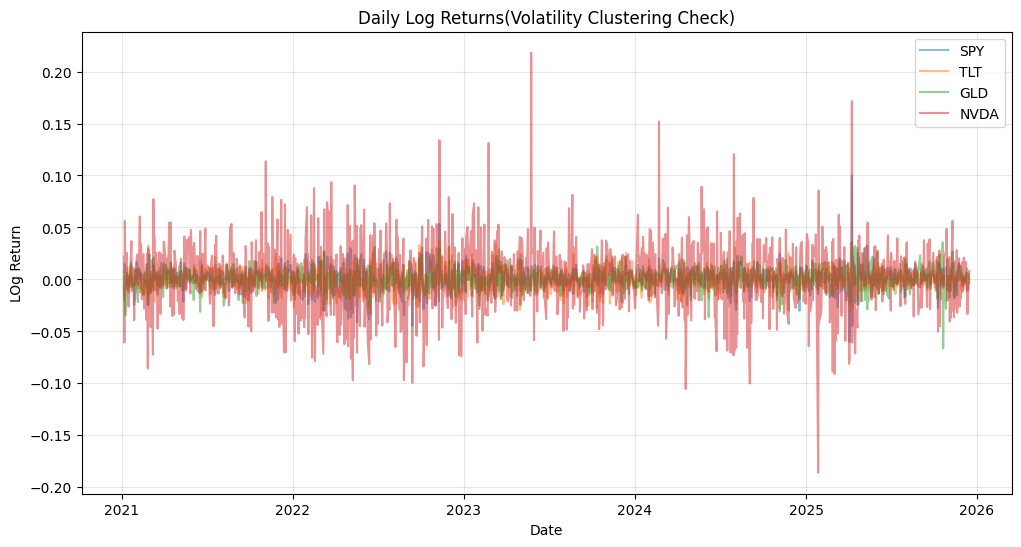

In [ ]:
# VISUALIZATION
# Plotting the Volatile Regimes vs Calm Regimes
plt.figure(figsize=(12,6))
for ticker in TICKERS:
  plt.plot(log_returns.index, log_returns[ticker], alpha= 0.5, label= ticker)

plt.title('Daily Log Returns(Volatility Clustering Check)')
plt.ylabel('LOg Return')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

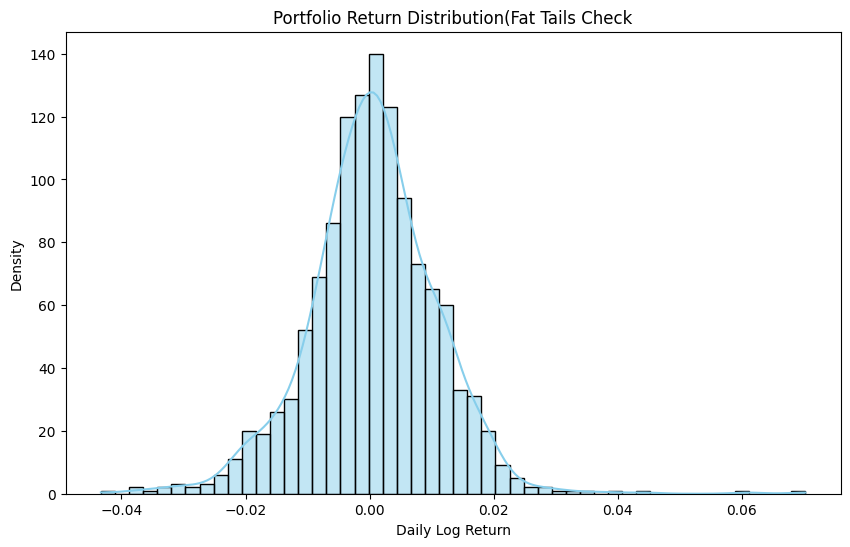

In [ ]:
# PORTFOLIO CONSTRUCTION
# First we'll assign weights to the assets
weights = np.array([0.3,0.4,0.1,0.2])
PORTFOLIO_VALUE = 1_000_000 # 1 million

portfolio_returns = log_returns.dot(weights)

#VISULIZATION OF THIS
plt.figure(figsize=(10,6))
sns.histplot(portfolio_returns, kde=True, bins=50, color='skyblue')
plt.title('Portfolio Return Distribution(Fat Tails Check')
plt.xlabel('Daily Log Return')
plt.ylabel('Density')
plt.show()

# **Method-1 Historical VaR & ES**

In [ ]:
# METHOD 1: HISTORICAL VaR & ES
def calculate_historical_metrics(returns, alpha=0.05):
  percentile = (1 - alpha)*100
  var_return = np.percentile(returns, percentile)
  var_dollar = PORTFOLIO_VALUE*(1-np.exp(var_return))
  tail_loss = returns[returns < var_return]
  es_return = tail_loss.mean()
  es_dollar = PORTFOLIO_VALUE*(1 - np.exp(es_return))
  return var_dollar, es_dollar

# Calculate VaR for 95% and 99%
var_95, es_95 = calculate_historical_metrics(portfolio_returns, alpha=0.95)
var_99, es_99 = calculate_historical_metrics(portfolio_returns, alpha= 0.99)
print(f"--- Historical Method Results (Portfolio: ${PORTFOLIO_VALUE:,.0f}) ---")
print(f"95% VaR: ${var_95:,.2f} | 95% ES: ${es_95:,.2f}")
print(f"99% VaR: ${var_99:,.2f} | 99% ES: ${es_99:,.2f}")

--- Historical Method Results (Portfolio: $1,000,000) ---
95% VaR: $16,769.08 | 95% ES: $22,513.02
99% VaR: $26,035.13 | 99% ES: $32,005.31


# **Method-2 Parametric VaR (Variance)**

In [ ]:
def calculate_parametric_var(returns, weights, alpha = 0.99):
  cov_matrix = returns.cov()
# Portfolio SD; Formula: sqrt(w.T @ Cov @ w)
  portfolio_sd = np.sqrt(weights.T @ cov_matrix @ weights)
# Calculated z-score
  z_score = norm.ppf(1-alpha)

  var_retun = z_score * portfolio_sd
  var_dollar = PORTFOLIO_VALUE * abs(var_retun)

  return var_dollar

#99% parametric VaR
parametric_var_99 = calculate_parametric_var(log_returns, weights, alpha=0.99)

print(f"--Parametric Method Results---")
print(f"99% Parametric VaR: ${parametric_var_99:,.2f}")
print(f"Difference from Historical VaR: ${abs(parametric_var_99 - var_99):,.2f}")


--Parametric Method Results---
99% Parametric VaR: $24,155.10
Difference from Historical VaR: $1,880.04


# **: Method 3 – Monte Carlo VaR (Cholesky Logic**

In [ ]:
def calculate_mc_var(returns, weights, alpha= 0.99,n_sims=100000):
  np.random.seed(42)

  #Basic Stats
  mean_returns = returns.mean()
  cov_matrix = returns.cov()

  #Cholesky Decompostion
  L = np.linalg.cholesky(cov_matrix) # L is lower than triangular matrix

  #Generate Random Noise
  Z = np.random.normal(size= (len(weights), n_sims))
  simulated_returns = (L @ Z ).T + mean_returns.values

  # Calculated Portfolio Scenarios
  sim_port_returns = simulated_returns @ weights

  # Calculate VaR
  mc_var_return = np.percentile(sim_port_returns, (1-alpha)*100)
  mc_var_dollar = PORTFOLIO_VALUE*(1- np.exp(mc_var_return))

  return mc_var_dollar

# Calculate VaR at 99%
mc_var_99 = calculate_mc_var(log_returns, weights, alpha= 0.99)

print(f"---Monte carlo Method Results---")
print(f"% Monte Carlo VaR: {mc_var_99:,.2f}")


---Monte carlo Method Results---
% Monte Carlo VaR: 23,491.89


# **Visualization (Plotly Express)**

In [ ]:
def get_mc_sims(returns, weights_vec, n_sims=10000):
    np.random.seed(42)
    L = np.linalg.cholesky(returns.cov())
    Z = np.random.normal(size=(len(weights_vec), n_sims))
    sim_returns = (L @ Z).T + returns.mean().values
    return sim_returns @ weights_vec

# Assign to variable for the Plotly chart
sim_port_returns = get_mc_sims(log_returns, weights)
mc_var_99 = PORTFOLIO_VALUE * (1 - np.exp(np.percentile(sim_port_returns, 1)))
df_sims = pd.DataFrame({'Simulated Returns': sim_port_returns})



viz_thresholds = {
    'Historical VaR': -np.log(1 - var_99/PORTFOLIO_VALUE),
    'Parametric VaR': -np.log(1 - parametric_var_99/PORTFOLIO_VALUE),
    'Monte Carlo VaR': -np.log(1 - mc_var_99/PORTFOLIO_VALUE)
}

methods = [
    ('Historical', viz_thresholds['Historical VaR'], '#EF553B', 0.90), # Red-ish
    ('Parametric', viz_thresholds['Parametric VaR'], '#FECB52', 0.80), # Yellow-ish
    ('Monte Carlo', viz_thresholds['Monte Carlo VaR'], '#00CC96', 0.70) # Cyan-ish
]

fig = px.histogram(
    df_sims,
    x="Simulated Returns",
    nbins=100,
    title="Portfolio Return Distribution & VaR Thresholds (99% Confidence)",
    labels={'Simulated Returns': 'Daily Log Return'},
    template="plotly_dark", # Professional "Terminal" look
    opacity=0.7
)

# Add vertical lines for each VaR method
colors = {'Historical VaR': 'red', 'Parametric VaR': 'yellow', 'Monte Carlo VaR': 'cyan'}

for name, val, color, y_pos in methods:
    # Add the vertical dashed line
    fig.add_vline(x=val, line_dash="dash", line_color=color)

    # Add staggered annotation with an arrow for clarity
    fig.add_annotation(
        x=val,
        y=y_pos,
        yref="paper",
        text=f"<b>{name} VaR</b>",
        showarrow=True,
        arrowhead=2,
        ax=60 if name != 'Historical VaR' else -60, # Historical on left, others on right
        ay=0,
        font=dict(color=color, size=12),
        bgcolor="rgba(0,0,0,0.6)",
        bordercolor=color,
        borderwidth=1
    )




fig.update_layout(showlegend=False, bargap = 0.05)
fig.show()


# **Stress Testing**

In [ ]:
def stress_test(PORTFOLIO_VALUE, weights, TICKERS):
  shocks = {
      'SPY': -0.10,
      'TLT': -0.05,
      'GLD': 0.02,
      'NVDA': -0.20
  }

  shock_vector = np.array([shocks[t] for t in TICKERS])

  stress_return = np.sum(weights*shock_vector)
  stress_loss_dollar = PORTFOLIO_VALUE * (1 - np.exp(stress_return))
  return stress_return, stress_loss_dollar

s_return, s_loss = stress_test(PORTFOLIO_VALUE, weights, TICKERS)
print(f"--- STRESS TEST REPORT: 'Tech Meltdown' Scenario ---")
print(f"Portfolio Shock Return: {s_return*100:.2f}%")
print(f"Total Dollar Loss: ${s_loss:,.2f}")
print(f"Compare to 99% VaR: ${parametric_var_99:,.2f}")


--- STRESS TEST REPORT: 'Tech Meltdown' Scenario ---
Portfolio Shock Return: -8.80%
Total Dollar Loss: $84,239.12
Compare to 99% VaR: $24,155.10


In [ ]:
import pandas as pd
import plotly.express as px

# 1. Prepare Data for the Stress Plot
stress_data = []
# Assuming TICKERS, weights, and PORTFOLIO_VALUE are in your namespace
shocks = {'SPY': -0.10, 'TLT': -0.05, 'GLD': 0.02, 'NVDA': -0.20}

for i, ticker in enumerate(TICKERS):
    asset_loss = (PORTFOLIO_VALUE * weights[i]) * (1 - np.exp(shocks[ticker]))
    stress_data.append({
        'Asset': ticker,
        'Impact ($)': asset_loss,
        'Type': 'Loss' if asset_loss > 0 else 'Gain'
    })

df_stress_results = pd.DataFrame(stress_data)
total_s_loss = df_stress_results['Impact ($)'].sum()

# 2. Create the Plotly Bar Chart
fig_stress = px.bar(
    df_stress_results,
    x='Asset',
    y='Impact ($)',
    color='Type',
    color_discrete_map={'Loss': '#EF553B', 'Gain': '#00CC96'},
    title=f"Stress Scenario Analysis: Tech Meltdown (Total Loss: ${total_s_loss:,.0f})",
    text_auto='.2s',
    template='plotly_dark'
)

# 3. Add a reference line for the 99% VaR
# This shows how much the stress test "breaks" the normal risk model
fig_stress.add_hline(
    y=parametric_var_99,
    line_dash="dash",
    line_color="yellow",
    annotation_text=f"99% VaR Limit (${parametric_var_99:,.0f})",
    annotation_position="top right"
)

fig_stress.update_layout(
    yaxis_title="Scenario Profit/Loss ($)",
    showlegend=False
)

fig_stress.show()